### Problem Statement:

**Context**:
The Gurugram-based FlipItNews aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors

**Objective**:
The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

### Attribute Information:

* Article
* Category

The feature names are themselves pretty self-explanatory.

### Our Approach:

1. Importing the libraries
2. Loading the dataset
  * Mounting the drive
  * Reading the data file
3. Data Exploration
  * Shape of the dataset
  * News articles per category
4. Text Processing
  * Removing the non-letters
  * Tokenizing the text
  * Removing stopwords
  * Lemmatization
5. Data Transformation
  * Converting to lower case
  * Encoding the target variable
  * Bag of Words
  * TF-IDF
  * Train-Test Split
6. Model Training & Evaluation
  * Simple Approach
    * Naive Bayes
  * Functionalized Code
    * Decision Tree
    * Nearest Neighbors
    * Random Forest

#### Importing the libraries -

In [1]:
# To ignore all warnings
import warnings

# For reading & manipulating the data
import pandas as pd
import numpy as np

# For visualizing the data
!pip install matplotlib --upgrade
import matplotlib.pyplot as plt
import seaborn as sns

# To use Regular Expressions
import re

# To use Natural Language Processing
import nltk

# For tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# To remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

# For lemmetization
from nltk import WordNetLemmatizer
nltk.download('wordnet')

# For BoW & TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# For encoding the categorical variable
!pip install category_encoders
import category_encoders as ce

# To try out different ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# To perform train-test split
from sklearn.model_selection import train_test_split

# Performace Metrics for evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

warnings.simplefilter('ignore')


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/leenasingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leenasingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/leenasingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
df = pd.read_csv('flipitnews-data.csv')
df.sample(10)

,Category,Article
819,Technology,mobile gaming takes off in india gaming on the...
1875,Entertainment,oscars race enters final furlong the race for ...
1982,Technology,the gaming world in 2005 if you have finished ...
39,Business,german growth goes into reverse germany s econ...
1364,Technology,evil twin fear for wireless net people using ...
1123,Business,qantas sees profits fly to record australian a...
1528,Entertainment,new york rockers top talent poll new york elec...
1314,Technology,ea to take on film and tv giants video game gi...
345,Sports,clijsters could play aussie open kim clijsters...
1641,Sports,tulu to appear at caledonian run two-time olym...


### Data Exploration

First, let's check the shape of the dataset that we have.

In [4]:
print("No. of rows and columns: {}".format(df.shape))

No. of rows and columns: (2225, 2)


*Observation: There are 2,225 different news articles present in the dataset.*

<Axes: xlabel='Category', ylabel='count'>

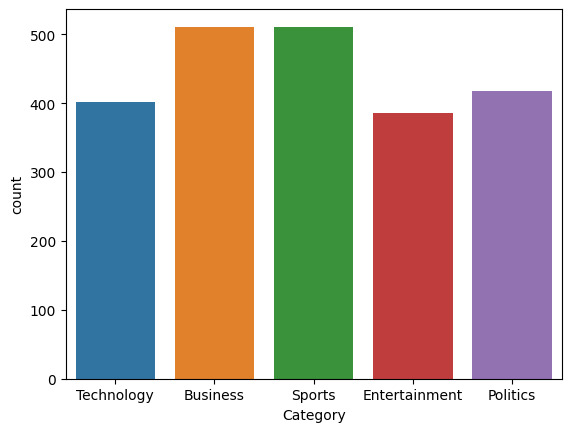

In [ ]:
#Distirbution of Category
sns.countplot(x=df['Category'])

*Observation: Most of the news articles in the dataset are from Business & Sports category.*

### Text Processing

Before processing -

In [10]:
df['Article'][1]

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

**Stemming vs. Lemmatization in NLP**

Both stemming and lemmatization are techniques used in Natural Language Processing (NLP) to reduce words to their root or base form. 

This helps in text preprocessing, improving the efficiency of machine learning models by reducing vocabulary size.

1. Stemming

Definition:
    
Stemming is a rule-based process of removing suffixes from a word to obtain its root form, often without considering the actual meaning. 
It may result in words that aren’t real dictionary words.

(e.g., “studies” → “studi”).

2. Lemmatization

Definition:
    
Lemmatization reduces words to their base or dictionary form (lemma) using linguistic rules and considers the context and meaning of the word. 
Unlike stemming, lemmatization always results in valid words.

(e.g., “studies” → “study”).

When to Use What?

•	Use Stemming when speed is more important than accuracy (e.g., search engines).

•	Use Lemmatization when meaning and correctness matter (e.g., chatbots, text summarization).

In [11]:
stop_words = list(stopwords.words("english"))

def text_process(sent):
    
    #Converting to lowercase
    sent= sent.lower()
    
    # Removing non-letters
    sent = re.sub('[^a-zA-Z]', ' ', sent)

    # Word tokenizing the text
    words = nltk.word_tokenize(sent)

    # Removing stopwords
    filtered_sent = [w for w in words if not w in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    new_txt = [lemmatizer.lemmatize(word) for word in filtered_sent]
    new_txt = " ".join(new_txt)

    return new_txt

df['Article'] = df['Article'].apply(text_process)

After processing -

In [12]:
df['Article'][1]

'worldcom bos left book alone former worldcom bos bernie ebbers accused overseeing bn bn fraud never made accounting decision witness told juror david myers made comment questioning defence lawyer arguing mr ebbers responsible worldcom problem phone company collapsed prosecutor claim loss hidden protect firm share mr myers already pleaded guilty fraud assisting prosecutor monday defence lawyer reid weingarten tried distance client allegation cross examination asked mr myers ever knew mr ebbers make accounting decision aware mr myers replied ever know mr ebbers make accounting entry worldcom book mr weingarten pressed replied witness mr myers admitted ordered false accounting entry request former worldcom chief financial officer scott sullivan defence lawyer trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house card mr ebbers team meanwhile looking portray affable bos admission pe graduate economist whatever ability mr ebbers transformed

### Data Transformation

**Encoding the target variable -**

We will be using the OrdinalEncoder from category_encoders.

What is Ordinal Encoding?

Ordinal encoding is a technique used to convert categorical variables into numeric values while preserving the natural order of categories. It is useful for ordinal data where categories have a meaningful ranking (e.g., “Low”, “Medium”, “High”).

Unlike Label Encoding (which assigns arbitrary numbers), Ordinal Encoding allows you to specify the category order to maintain proper relationships in machine learning models.

In [13]:
encode = ce.OrdinalEncoder(cols=['Category'])
df = encode.fit_transform(df)

**Outcome labels after encoding -**

Category:

1 - Technology

2 - Business

3 - Sports

4 - Entertainment

5 - Politics

**Bag of Words / TF-IDF**

We've given the user a choice to select one of the following techniques for vectorizing the data -
* BoW
* TF-IDF

Both Bag of Words (BoW) and TF-IDF are text vectorization techniques used in Natural Language Processing (NLP) to convert text into numerical representations for machine learning models.

**1. Bag of Words (BoW)**

Definition

The Bag of Words (BoW) model represents text as a collection of words without considering order or context. It creates a matrix where:

•	Each row represents a document (sentence, paragraph, or text).

•	Each column represents a unique word (feature) from the entire corpus.

•	The values represent the frequency of words in the document.


**2. Term Frequency-Inverse Document Frequency (TF-IDF)**

Definition

TF-IDF (Term Frequency - Inverse Document Frequency) is a more advanced text representation technique that:

•	Penalizes frequently occurring words (like “the”, “is”, etc.)

•	Gives higher importance to rare but significant words

It consists of two components:

1.	Term Frequency (TF): Measures how often a word appears in a document.

TF = Number of times word appears in a document/Total words in the document

2.	Inverse Document Frequency (IDF): Measures how unique a word is across documents.

IDF = log({Total number of documents}/{Number of documents containing the word})


Final TF-IDF score:

TF-IDF = TF * IDF


Conclusion

•	Use BoW when you need a quick, simple representation of text data.

•	Use TF-IDF when you need to focus on important words while ignoring common ones.

In [16]:
choice = int(input("Choose \n (1) If you want to use Bag of Words \n (2) If you want to use TF-IDF \n Choice: "))

if choice == 1:
    print('Going ahead with BoW')
    cv = CountVectorizer(max_features=5000) #BOW
    X = cv.fit_transform(df. Article).toarray()
    y = np.array(df['Category'].values)

elif choice == 2:
    print('Going ahead with TF-IDF')
    tf_idf = TfidfVectorizer() #TF-IDF
    X = tf_idf.fit_transform(df.Article).toarray()
    y = np.array(df['Category'].values)

else:
    print("Wrong Input!")

Going ahead with BoW


In [17]:
#train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25,
                                                shuffle=True, stratify=y,
                                                random_state=42)

In [18]:
#shape of the train and test data

print("No. of rows in train set is {}.".format(X_train.shape[0]))
print("No. of rows in test set is {}.".format(X_val.shape[0]))

No. of rows in train set is 1668.
No. of rows in test set is 557.


### Modelling

#### Naive Bayes Classifier

Naïve Bayes is a probabilistic classification algorithm based on Bayes’ Theorem. It assumes that features are independent of each other, which is why it’s called “naïve.” Despite this assumption, it performs well in many real-world applications, especially in text classification (spam detection, sentiment analysis, etc.).



**Understanding Bayes’ Theorem**

Naïve Bayes is based on Bayes’ Theorem, which calculates the probability of a hypothesis (class label) given some evidence (features):


P(A|B) = {P(B|A).P(A)}/{P(B)}


Where:
•	 P(A|B)  = Posterior Probability (Probability of class A given data B)

•	 P(B|A)  = Likelihood (Probability of data B occurring in class A)

•	 P(A)  = Prior Probability (Probability of class A occurring)

•	 P(B)  = Evidence (Overall probability of data B)


2. How Naïve Bayes Works in Classification

	1.	Calculate the prior probability for each class.

	2.	Compute the likelihood (conditional probability of each feature given the class).

	3.	Use Bayes’ Theorem to calculate the posterior probability for each class.
    
	4.	Assign the class with the highest probability as the prediction.

**Multinomial Naïve Bayes (For Text Data)**

•	Used for text classification (spam detection, sentiment analysis, etc.)

•	Works well with Bag of Words (BoW) or TF-IDF representations.

•	Uses word frequencies as features.


In [19]:
# Training the model -
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [20]:
# Calculating the train & test accuracy -
nb_train = accuracy_score(y_train, nb.predict(X_train))
nb_test = accuracy_score(y_val, nb.predict(X_val))

print("Train accuracy :{:.3f}".format(nb_train))
print("Test accuracy :{:.3f}".format(nb_test))

Train accuracy :0.989
Test accuracy :0.978


In [21]:
# Making predictions on the test set -
y_pred_nb = nb.predict(X_val)
y_pred_proba_nb = nb.predict_proba(X_val)

In [22]:
y_pred_nb

array([1, 1, 2, 2, 2, 1, 4, 2, 3, 1, 2, 5, 5, 5, 1, 4, 3, 4, 3, 5, 5, 2,
       2, 3, 4, 2, 3, 3, 3, 2, 2, 3, 2, 3, 5, 4, 3, 3, 3, 4, 2, 3, 2, 5,
       1, 2, 5, 1, 1, 2, 5, 3, 5, 2, 5, 3, 5, 3, 5, 1, 3, 1, 1, 3, 1, 5,
       2, 1, 2, 4, 3, 5, 5, 4, 5, 3, 2, 5, 1, 3, 4, 3, 4, 2, 4, 3, 4, 4,
       3, 5, 2, 1, 1, 3, 3, 3, 2, 4, 4, 2, 5, 1, 5, 1, 4, 4, 2, 3, 1, 4,
       4, 3, 1, 3, 1, 2, 3, 5, 4, 1, 3, 2, 4, 4, 5, 4, 3, 5, 3, 4, 3, 4,
       3, 3, 5, 4, 5, 5, 5, 5, 3, 3, 5, 1, 3, 1, 4, 2, 2, 3, 4, 4, 3, 2,
       4, 5, 2, 5, 3, 3, 4, 5, 2, 5, 3, 5, 1, 4, 4, 2, 1, 2, 1, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 3, 4, 4, 1, 2, 4, 3, 5, 4, 3, 2, 5, 2, 3, 3, 1,
       3, 1, 5, 2, 1, 2, 2, 2, 2, 4, 4, 2, 5, 3, 5, 1, 1, 5, 2, 2, 3, 2,
       2, 5, 5, 3, 5, 5, 5, 1, 4, 4, 4, 3, 3, 3, 1, 2, 1, 2, 2, 5, 3, 5,
       2, 4, 5, 2, 3, 3, 5, 3, 5, 3, 4, 1, 1, 1, 3, 2, 4, 1, 1, 1, 2, 1,
       5, 1, 5, 2, 2, 4, 1, 3, 5, 4, 1, 4, 1, 2, 1, 2, 5, 3, 1, 2, 4, 3,
       1, 4, 5, 4, 2, 5, 4, 5, 3, 3, 1, 1, 2, 5, 1,

In [23]:
y_pred_proba_nb

array([[1.00000000e+000, 8.61680255e-105, 3.28402811e-147,
        7.51041725e-094, 9.06420082e-137],
       [1.00000000e+000, 1.42319371e-074, 2.34081707e-149,
        9.50899723e-089, 1.61523687e-114],
       [5.43631304e-057, 1.00000000e+000, 1.34889284e-082,
        1.25406540e-058, 7.81799175e-053],
       ...,
       [7.82762321e-046, 4.69674513e-049, 1.00000000e+000,
        1.28013772e-038, 4.14485259e-044],
       [1.00000000e+000, 1.35511605e-156, 1.03775881e-248,
        1.53729775e-177, 4.94179436e-181],
       [1.36348745e-101, 2.43561904e-086, 1.00000000e+000,
        2.56360202e-091, 1.42763671e-088]])

1️⃣ What is ROC AUC Score?

ROC AUC Score is a performance metric for classification models, especially binary classification. It evaluates how well the model distinguishes between positive and negative classes.

📌 Key Terms:<br>
•	ROC (Receiver Operating Characteristic) Curve: A graph that shows the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR) at different classification thresholds.<br>
•	AUC (Area Under the Curve): A single value that summarizes the performance of the ROC curve.


Formula for TPR (Recall) and FPR:

TPR = {TP}/{TP + FN} 


FPR = {FP}/{FP + TN} 


🔹 Higher AUC (i.e. approaching 1) = Better model at distinguishing classes.<br>
🔹 If AUC ≈ 0.5, the model is as good as random guessing.

3️⃣ When to Use ROC AUC?

✅ For Imbalanced Datasets:<br>
•	Accuracy can be misleading when one class is dominant.<br>
•	ROC AUC is threshold-independent, making it useful for imbalanced classes.<br>

✅ For Binary Classification:<br>
•	Works best when predicting two classes (e.g., spam vs. not spam, fraud vs. non-fraud).

✅ For Comparing Models:<br>
•	If two models have similar accuracy, compare their ROC AUC scores to see which is better.

In [25]:
# Computing the ROC AUC score -
print("ROC AUC Score: {:.3f}".format(roc_auc_score(y_val, y_pred_proba_nb, multi_class='ovr')))

ROC AUC Score: 0.998


What is One-vs-Rest (OvR)?

One-vs-Rest (also called One-vs-All, OvA) is a multi-class classification strategy that transforms a multi-class problem into multiple binary classification problems.

For a classification task with N classes, OvR:<br>
•	Trains N binary classifiers, one for each class.<br>
•	Each classifier distinguishes one class (positive) from all other classes (negative).<br>
•	The class with the highest probability is chosen as the final prediction.

How it Works?

For a dataset with 3 classes:<br>
🚀 Classes: Apple, Banana, Cherry

✅ OvR creates 3 separate classifiers:<br>
1️⃣ Classifier 1: Apple vs. (Banana, Cherry)<br>
2️⃣ Classifier 2: Banana vs. (Apple, Cherry)<br>
3️⃣ Classifier 3: Cherry vs. (Apple, Banana)

During prediction, the class with the highest confidence score is selected.

In [26]:
# Computing the precision, recall & f1 score -
precision = precision_score(y_val, y_pred_nb, average='weighted')
recall = recall_score(y_val, y_pred_nb, average='weighted')
f1 = f1_score(y_val, y_pred_nb, average='weighted')

print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

Precision: 0.979
Recall: 0.978
F1 Score: 0.978


Precision (Positive Predictive Value)

Definition:


Precision = {TP}/{TP + FP}

•	Measures how many of the predicted positive cases were actually positive.<br>
•	High Precision means fewer False Positives (FP).

✅ Use case: When False Positives are costly (e.g., Spam Detection: Predicting a real email as spam is bad).

Recall (Sensitivity or True Positive Rate)

Definition:


Recall = {TP}/{TP + FN}

•	Measures how many actual positives were correctly predicted.<br>
•	High Recall means fewer False Negatives (FN).

✅ Use case: When False Negatives are costly (e.g., Medical Diagnosis: Missing a cancer case is dangerous).

F1 Score (Harmonic Mean of Precision & Recall)

Definition:


F1 Score = 2 * {Precision} * {Recall}/({Precision} + {Recall})

•	Balances Precision & Recall, useful when they are unequal.<br>
•	High F1 Score indicates a good balance between False Positives and False Negatives.

✅ Use case: When you need a trade-off between Precision & Recall (e.g., Fraud Detection: Avoid false alarms but still detect fraud).

In [27]:
print(classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98       100
           2       0.98      0.95      0.96       128
           3       1.00      1.00      1.00       128
           4       0.99      0.97      0.98        97
           5       0.95      0.98      0.97       104

    accuracy                           0.98       557
   macro avg       0.98      0.98      0.98       557
weighted avg       0.98      0.98      0.98       557



Now, we'll try to functionalize the above code so that we can use it for a few more different models.

In [28]:
def model_train(obj):
    obj.fit(X_train, y_train) # Training the model
    y_pred = obj.predict(X_val) # Making predictions
    y_pred_proba = obj.predict_proba(X_val)
    return y_pred, y_pred_proba

In [29]:
def model_eval(obj, y_pred, y_pred_proba):
    print("-------------------------")

    # Calculating the train & test accuracy
    train_acc = accuracy_score(y_train, obj.predict(X_train))
    test_acc = accuracy_score(y_val, obj.predict(X_val))

    print("Train Accuracy: {:.3f}".format(train_acc))
    print("Test Accuracy: {:.3f}\n".format(test_acc))

    # Computing the ROC AUC score
    print("ROC AUC Score: {:.3f}\n".format(roc_auc_score(y_val, y_pred_proba, multi_class='ovr')))

    # Computing the precision, recall & f1 score
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    print("Precision: {:.3f}".format(precision))
    print("Recall: {:.3f}".format(recall))
    print("F1 Score: {:.3f}".format(f1))

    print("-------------------------")

### Decision Tree Classifier

In [ ]:
model_dt=DecisionTreeClassifier()

# Training the model -
y_pred_dt, y_pred_proba_dt = model_train(model_dt)

# Evaluating the model -
model_eval(model_dt, y_pred_dt, y_pred_proba_dt)

-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.842

ROC AUC Score: 0.900

Precision: 0.842
Recall: 0.842
F1 Score: 0.842
-------------------------


### KNN

In [34]:
model_knn= KNeighborsClassifier(n_neighbors=5)

# Training the model -
y_pred_knn, y_pred_proba_knn = model_train(model_knn)

# Evaluating the model -
model_eval(model_knn, y_pred_knn, y_pred_proba_knn)

-------------------------
Train Accuracy: 0.824
Test Accuracy: 0.724

ROC AUC Score: 0.933

Precision: 0.824
Recall: 0.724
F1 Score: 0.720
-------------------------


### Random Forest

In [35]:
model_rf=RandomForestClassifier()

# Training the model -
y_pred_rf, y_pred_proba_rf = model_train(model_rf)

# Evaluating the model -
model_eval(model_rf, y_pred_rf, y_pred_proba_rf)

-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.961

ROC AUC Score: 0.997

Precision: 0.960
Recall: 0.961
F1 Score: 0.960
-------------------------


•	High train accuracy (≈100%) + Low test accuracy → Overfitting<br>
•	Both train & test accuracies are similar → Good generalization

*Observation: Out of all the models tested till now, Naive Bayes Classifier seems to be the best performing one since it gives good train & test accuracy, more than satisfactory precision & recall and almost non-significant overfitting.*